In [ ]:
#This notebook explores simple Linear Regression in supervised ML models

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
companies = pd.read_csv("data/1000_Companies.csv")

In [116]:
companies.groupby('State').agg({'State': 'count'})

,State
State,
California,344
Florida,322
New York,334


In [117]:
X = companies.iloc[:, :4].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [118]:
y= companies.iloc[:, 4].values
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [119]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


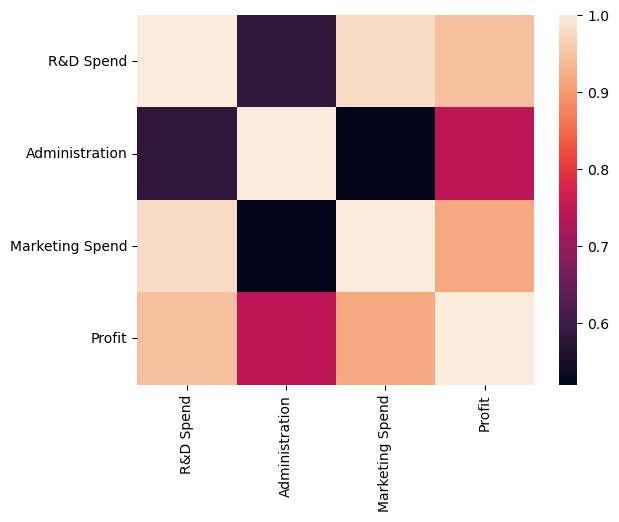

In [120]:
sns.heatmap(companies.select_dtypes(include='number').corr())
plt.show()

In [121]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'  # keep the other columns (Age, Salary)
)

X= ct.fit_transform(X)


In [122]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 100275.47 241926.31 227142.82]
 [1.0 0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 0.0 1.0 161181.72 270939.86 295442.17]]


In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [125]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89394.23575033,  88027.95819516,  94508.53314456, 175549.39580413,
        83150.97998075, 110365.61149629, 131468.83716137,  91080.37178898,
       164499.09125685,  52845.80977357,  66508.01269669, 150384.61048744,
       126593.26898994,  58880.41811175, 177293.42838504,  75039.29849959,
       118001.51199867, 164327.97934563, 174978.3486738 , 182006.18783199,
       124009.89479312,  85265.30904177, 180871.77326233,  83737.38254065,
       104639.96676191, 100860.1328575 ,  55972.52100479,  56567.46734373,
        68458.1180678 , 211528.90031711, 120537.16479697, 111372.47323668,
       101263.40023154, 137751.91749039,  63521.80637149, 108499.76514776,
       185959.70818607, 171302.67161102, 174510.71530107, 117423.7029346 ,
        96497.33588966, 165207.59035385, 107363.92335611,  49811.45273478,
       116263.78584195,  58173.63390514, 158250.37929295,  78215.23575464,
       159564.20687058, 130917.09063892, 184767.68475627, 174475.46214049,
        93357.21436254,  

In [127]:
print(regressor.coef_)

[ 4.46921768e+02 -3.42694235e+02 -1.04227533e+02  5.26047095e-01
  9.78530820e-01  9.80946128e-02]


In [128]:
print(regressor.intercept_)

-66123.76082364432


In [129]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9311120236268364